In [1]:
from consMDP import ConsMDP
import safety, dot
from reachability import PositiveReachability
dot.dotpr = 'neato'

In [2]:
def consMDP_flower(cap=8):
    m = ConsMDP()
    m.new_states(2)
    m.add_action(1,{0:1},"a",1)
    m.add_action(0,{1:1},"t",cap)
    m.set_reload(1)

    for c in range(1,cap):
        s = m.new_state(reload=True)
        m.add_action(0,{s:1},f"{s}",cap-c)
        m.add_action(s,{0:1},"a",c-1)
    return m

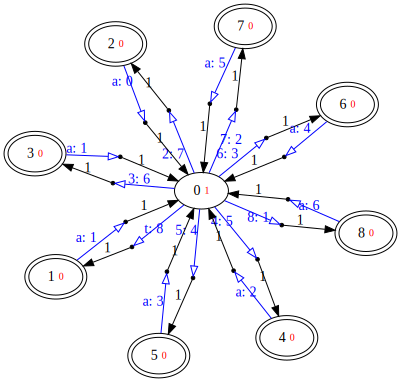

In [3]:
m = consMDP_flower()
m.show("S")

In [4]:
pr = PositiveReachability(m, set([1]), 8)

In [5]:
pr.get_positive_reachability()

[1, 0, 0, 0, 0, 0, 0, 0, 0]

In [6]:
def consMDP_double_flower(cap=32,path=3):
    m = ConsMDP()
    m.new_states(2)
    #m.add_action(1,{0:1},"a",1)
    #m.add_action(0,{1:1},"t",cap)

    for c in range(2,cap, 2):
        s = m.new_state(reload=True, label = f"{c}")
        h = (c//2) % 2
        m.add_action(h,{s:1},f"{s}",cap-c)
        m.add_action(s,{h:1},"a",c-1)
        
    prev_o = 1
    prev_e = 0
    for p in range(path):
        curr_o = m.new_state()
        curr_e = m.new_state()

        m.add_action(prev_o,{curr_o:1},"p",0)
        m.add_action(prev_e,{curr_e:1},"p",0)
        
        prev_o = curr_o
        prev_e = curr_e
        
    m.add_action(prev_o,{0:1},"p",1)
    m.add_action(prev_e,{1:1},"p",1)
    
    return m

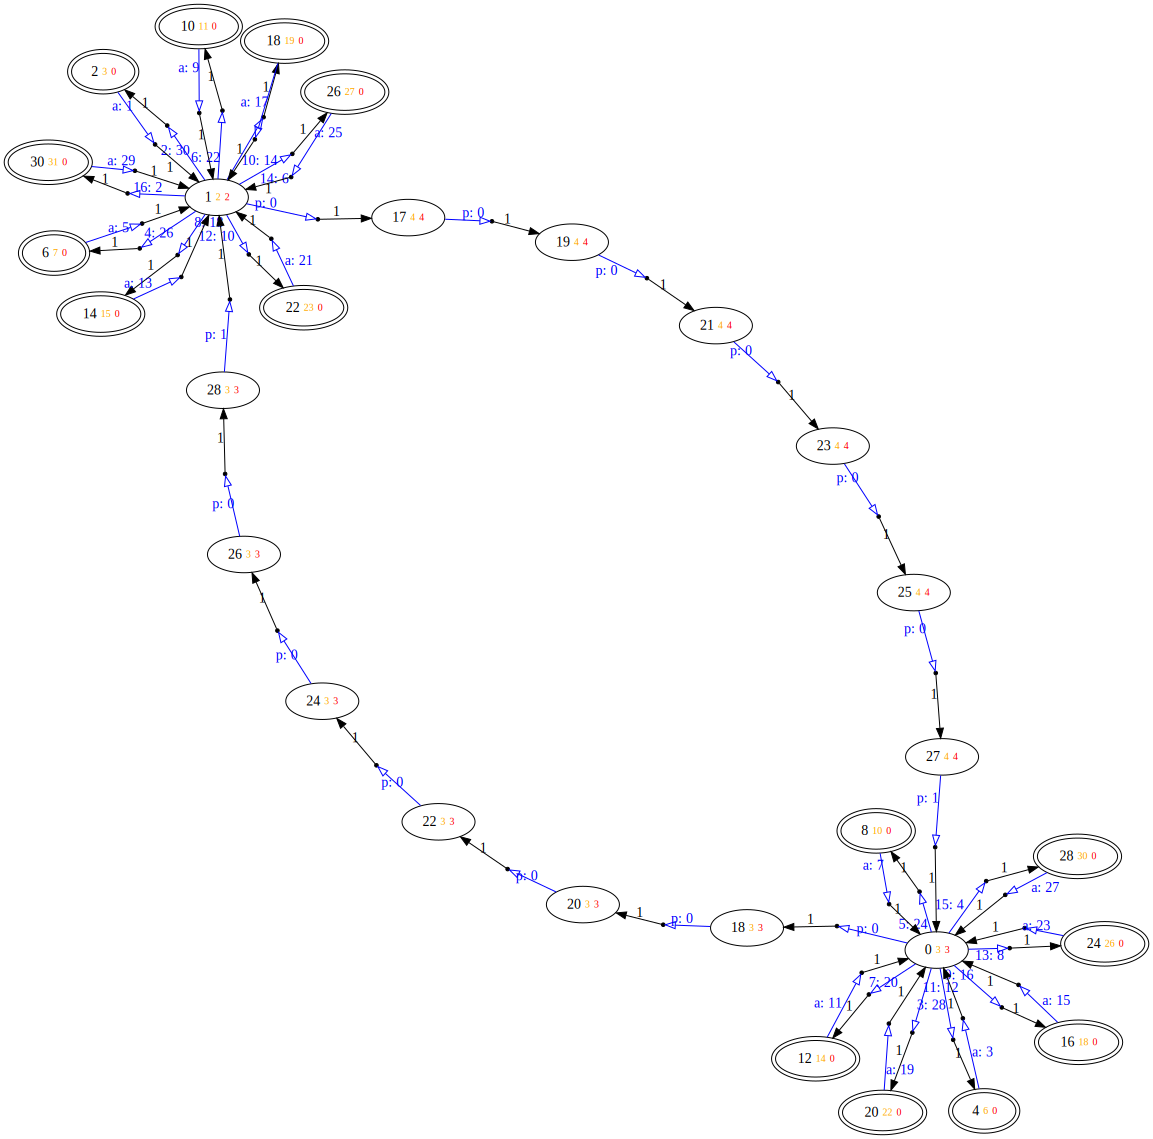

In [7]:
cap = 32 # We have cap/2 reload states, cap/4 in each flower
path = 6
m = consMDP_double_flower(cap, path)
m.get_safeReloads(cap)
m

In [9]:
safety.debug = True
pr = PositiveReachability(m, set([2]), cap+2)
pr.get_positive_reachability()

it 0	:[inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
it 1	:[4, 2, 3, 7, 7, 11, 11, 15, 15, 19, 19, 23, 23, 27, 27, 31, 31, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 5, 3]
it 2	:[4, 2, 3, 7, 7, 11, 11, 15, 15, 19, 19, 23, 23, 27, 27, 31, 31, inf, inf, inf, inf, inf, inf, inf, inf, 5, 3, 5, 3]
it 3	:[4, 2, 3, 7, 7, 11, 11, 15, 15, 19, 19, 23, 23, 27, 27, 31, 31, inf, inf, inf, inf, inf, inf, 5, 3, 5, 3, 5, 3]
it 4	:[4, 2, 3, 7, 7, 11, 11, 15, 15, 19, 19, 23, 23, 27, 27, 31, 31, inf, inf, inf, inf, 5, 3, 5, 3, 5, 3, 5, 3]
it 5	:[4, 2, 3, 7, 7, 11, 11, 15, 15, 19, 19, 23, 23, 27, 27, 31, 31, inf, inf, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3]
it 6	:[4, 2, 3, 7, 7, 11, 11, 15, 15, 19, 19, 23, 23, 27, 27, 31, 31, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3]
it 7	:[3, 2, 3, 6, 7, 10, 11, 14, 15, 18, 19, 22, 23, 26, 27, 30, 31, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 4, 3]
it 8	:[3, 2, 3, 6, 7, 10, 11, 14, 15, 18, 19, 

[3,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3]

In [11]:
pr = PositiveReachability(m, set([2]), cap)
print(pr.get_positive_reachability())

it 0	:[inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
it 1	:[4, 2, 3, 7, 7, 11, 11, 15, 15, 19, 19, 23, 23, 27, 27, 31, 31, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 5, 3]
it 2	:[4, 2, 3, 7, 7, 11, 11, 15, 15, 19, 19, 23, 23, 27, 27, 31, 31, inf, inf, inf, inf, inf, inf, inf, inf, 5, 3, 5, 3]
it 3	:[4, 2, 3, 7, 7, 11, 11, 15, 15, 19, 19, 23, 23, 27, 27, 31, 31, inf, inf, inf, inf, inf, inf, 5, 3, 5, 3, 5, 3]
it 4	:[4, 2, 3, 7, 7, 11, 11, 15, 15, 19, 19, 23, 23, 27, 27, 31, 31, inf, inf, inf, inf, 5, 3, 5, 3, 5, 3, 5, 3]
it 5	:[4, 2, 3, 7, 7, 11, 11, 15, 15, 19, 19, 23, 23, 27, 27, 31, 31, inf, inf, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3]
it 6	:[4, 2, 3, 7, 7, 11, 11, 15, 15, 19, 19, 23, 23, 27, 27, 31, 31, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3]
it 7	:[3, 2, 3, 6, 7, 10, 11, 14, 15, 18, 19, 22, 23, 26, 27, 30, 31, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 4, 3]
it 8	:[3, 2, 3, 6, 7, 10, 11, 14, 15, 18, 19, 